C:\Users\HP\AppData\Local\Temp\ipykernel_10440\4007929928.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series.index = pd.date_range(start='2020-01-01', periods=len(series), freq='M')


                                     SARIMAX Results                                      
Dep. Variable:                              HbA1c   No. Observations:                  601
Model:             ARIMA(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -841.486
Date:                            Fri, 30 Jan 2026   AIC                           1696.971
Time:                                    13:09:09   BIC                           1727.427
Sample:                                01-31-2020   HQIC                          1708.851
                                     - 01-31-2070                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9966      0.052    -19.053      0.000      -1.099      -0.894
ar.L2         -0.0777      0.045   

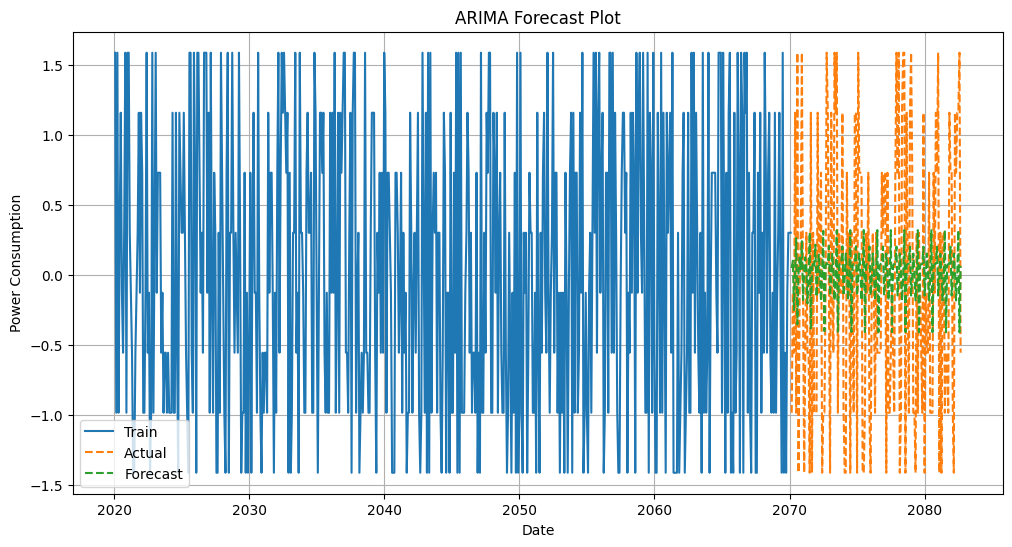

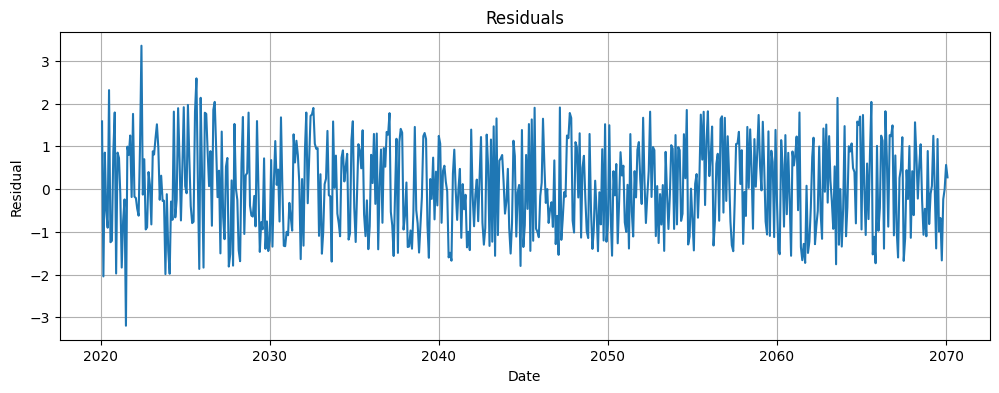


Ljung-Box Test:
     lb_stat  lb_pvalue
10  4.578971   0.917474

Forecast Accuracy:
MAE : 0.8669819466344655
RMSE: 0.9921834162899332
MAPE: 107.54848366520405 %


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load dataset
# Replace with your actual file and column name
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML470_S3_Diabetes_Data_Preprocessed_Concept.xlsx")

# Assume column name is 'Consumption'
series = df['HbA1c']
series.index = pd.date_range(start='2020-01-01', periods=len(series), freq='M')

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

model = ARIMA(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

print(model_fit.summary())

# 4. Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# 5. Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual', linestyle='--')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("ARIMA Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid()
plt.show()

# 6. Residual Analysis
residuals = model_fit.resid

plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.grid()
plt.show()

# 7. Ljung-Box Test
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test:")
print(ljung_box)

# 8. Accuracy Metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nForecast Accuracy:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")
